# Laboratorium 4
## ADAM GAWRYŚ, DAWID KLEINA

## Zadanie 1. (1 pkt.)
Zbiór danych: https://archive.ics.uci.edu/ml/datasets/SmartphoneBased+Recognition+of+Human+Activities+and+Postural+Transitions

• Treningowy: X_train.txt / y_train.txt

• Testowy: X_test.txt / y_test.txt

In [99]:
import numpy as np
import pandas as pd 
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import collections
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [100]:
data_train = pd.read_csv("X_train.txt", sep=" ", header = None)
result_train = pd.read_csv("y_train.txt", sep=" ", header = None)
data_test = pd.read_csv("X_test.txt", sep=" ", header = None)
result_test = pd.read_csv("y_test.txt", sep=" ", header = None)

In [4]:
data_train = pd.DataFrame(data=data_train)
result_train = pd.DataFrame(data=result_train)
data_test = pd.DataFrame(data=data_test)
result_test = pd.DataFrame(data=result_test)

data_train.reset_index(drop=True)
result_train.reset_index(drop=True)
data_test.reset_index(drop=True)
result_test.reset_index(drop=True)

,0
0,5
1,5
2,5
3,5
4,5
...,...
3157,2
3158,2
3159,2
3160,2


In [5]:
X_train = data_train
y_train = result_train
X_test = data_test
y_test = result_test

In [6]:
y_train = np.resize(y_train, (7767,))
y_train.shape

(7767,)

In [7]:
y_test = np.resize(y_test, (3162,))
y_test.shape

(3162,)

## Zadanie 2. (2 pkt.)
Zbuduj modele predykcyjne na podstawie następujących algorytmów zakładając domyślne
parametry:

• SVM

• kNN

• Decision Tree

• Random Forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Algorytm SVM 

In [46]:
svm_1 = svm.SVC(decision_function_shape='ovr')
svm_1.fit(X_train, np.ravel(y_train,order='C'))
y_pred = svm_1.predict(X_test)

### KNN

In [69]:
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train, y_train)
y_pred_knn_1 = knn_1.predict(X_test)

### DECISION TREE

In [65]:
rf_1 = RandomForestClassifier(n_estimators=20, random_state=0)
rf_1.fit(X_train, y_train)
y_pred_rf_1 = rf_1.predict(X_test)

### RANDOM FOREST

In [30]:
dt_1 = DecisionTreeClassifier()
dt_1 = dt_1.fit(X_train,y_train)
y_pred_dt_1 = dt_1.predict(X_test)

## Zadanie 3. (1 pkt.)
Na podstawie zdefiniowanych metryk oceny klasyfikatorów oceń skuteczność klasyfikacji algorytmów z zadania 2:

• Confusion matrix: TP / TN / FP / FN

• ACC

• Recall

• F1

• AUC


### SVM:

In [47]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[489   4   3   0   0   0   0   0   0   0   0   0]
 [ 22 449   0   0   0   0   0   0   0   0   0   0]
 [ 10  26 384   0   0   0   0   0   0   0   0   0]
 [  0   3   0 454  51   0   0   0   0   0   0   0]
 [  0   0   0  29 527   0   0   0   0   0   0   0]
 [  0   0   0   0   0 545   0   0   0   0   0   0]
 [  0   2   0   2   0   0  18   0   1   0   0   0]
 [  0   0   0   0   0   0   2   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28   0   4   0]
 [  0   0   0   0   0   0   0   0   1  18   0   6]
 [  1   2   0   2   0   2   1   0  14   0  27   0]
 [  1   0   0   0   0   0   0   0   0   9   2  15]]
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       496
           2       0.92      0.95      0.94       471
           3       0.99      0.91      0.95       420
           4       0.93      0.89      0.91       508
           5       0.91      0.95      0.93       556
           6       1.00      1.00      1.00       545
        

In [51]:
y_pred = OneHotEncoder().fit_transform(y_pred.reshape(-1, 1)).toarray()
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')
print(roc_auc)

0.9127519884019203


### KNN

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn_1))
print(classification_report(y_test, y_pred_knn_1))

[[486   2   8   0   0   0   0   0   0   0   0   0]
 [ 39 423   9   0   0   0   0   0   0   0   0   0]
 [ 43  50 327   0   0   0   0   0   0   0   0   0]
 [  0   4   0 398 106   0   0   0   0   0   0   0]
 [  0   2   0  42 512   0   0   0   0   0   0   0]
 [  0   1   0   2   1 541   0   0   0   0   0   0]
 [  1   3   0   1   0   0  17   0   1   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  28   0   4   0]
 [  0   0   0   0   0   0   0   0   1  22   0   2]
 [  2   4   1   0   1   1   2   0  15   0  23   0]
 [  1   0   0   0   0   0   0   0   1  12   2  11]]
              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.87      0.90      0.88       471
           3       0.95      0.78      0.85       420
           4       0.90      0.78      0.84       508
           5       0.83      0.92      0.87       556
           6       1.00      0.99      1.00       545
        

In [71]:
y_pred_knn_1 = OneHotEncoder().fit_transform(y_pred_knn_1.reshape(-1, 1)).toarray()
roc_auc = roc_auc_score(y_test, y_pred_knn_1, multi_class='ovr')
print(roc_auc)

0.8995627260424816


### DECISION TREE

In [23]:
print(confusion_matrix(y_test, y_pred_dt_1))
print(classification_report(y_test, y_pred_dt_1))

[[377 106  13   0   0   0   0   0   0   0   0   0]
 [ 49 361  59   0   0   0   0   0   0   0   2   0]
 [ 34  67 318   0   0   0   1   0   0   0   0   0]
 [  0   0   0 406  99   0   2   0   0   0   0   1]
 [  0   0   0  75 480   0   0   0   1   0   0   0]
 [  0   2   1   0   0 541   1   0   0   0   0   0]
 [  0   1   0   0   2   0  15   2   0   1   2   0]
 [  0   0   0   0   0   0   1   8   1   0   0   0]
 [  0   1   0   1   1   0   0   0  17   1  10   1]
 [  0   0   0   0   0   0   0   0   1  17   0   7]
 [  1   3   0   0   1   1   4   0   8   0  31   0]
 [  1   0   1   0   0   0   2   0   0  11   0  12]]
              precision    recall  f1-score   support

           1       0.82      0.76      0.79       496
           2       0.67      0.77      0.71       471
           3       0.81      0.76      0.78       420
           4       0.84      0.80      0.82       508
           5       0.82      0.86      0.84       556
           6       1.00      0.99      1.00       545
        

In [55]:
y_pred_dt_1 = OneHotEncoder().fit_transform(y_pred_dt_1.reshape(-1, 1)).toarray()
roc_auc = roc_auc_score(y_test, y_pred_dt_1, multi_class='ovr')
print(roc_auc)

0.8519110064338976


### RANDOM FOREST

In [66]:
print(confusion_matrix(y_test, y_pred_rf_1))
print(classification_report(y_test, y_pred_rf_1))

[[472  10  14   0   0   0   0   0   0   0   0   0]
 [ 55 408   8   0   0   0   0   0   0   0   0   0]
 [ 22  44 354   0   0   0   0   0   0   0   0   0]
 [  0   0   0 448  58   0   1   1   0   0   0   0]
 [  0   0   0  51 504   0   1   0   0   0   0   0]
 [  0   0   1   0   0 544   0   0   0   0   0   0]
 [  0   1   0   3   1   0  17   0   0   0   1   0]
 [  0   0   0   1   0   0   1   8   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27   0   5   0]
 [  0   0   0   0   0   0   0   0   1  18   0   6]
 [  2   3   1   2   0   0   2   0  12   0  27   0]
 [  1   1   0   0   0   0   0   0   0  10   2  13]]
              precision    recall  f1-score   support

           1       0.86      0.95      0.90       496
           2       0.87      0.87      0.87       471
           3       0.94      0.84      0.89       420
           4       0.89      0.88      0.88       508
           5       0.90      0.91      0.90       556
           6       1.00      1.00      1.00       545
        

In [67]:
y_pred_rf_1 = OneHotEncoder().fit_transform(y_pred_rf_1.reshape(-1, 1)).toarray()
roc_auc = roc_auc_score(y_test, y_pred_rf_1, multi_class='ovr')
print(roc_auc)

0.8943369541910985


## Zadanie 3. (2 pkt.)

Dokonaj wyboru najlepszego algorytmu klasyfikacji na podstawie kros-walidacji (CV) dla 5
podprób. Jako rezultat zwróć następujące parametry:

• Wartości średniej z wyników klasyfikacji

• Średniego odchylenia standardowego z wyników klasyfikacji

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [27]:
#SWM

skf = StratifiedKFold(n_splits=5)
accuracies = cross_val_score(estimator = svm_1, X=X_train, y=y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.90 %
Standard Deviation: 1.96 %


In [28]:
#KNN

skf = StratifiedKFold(n_splits=5)
accuracies = cross_val_score(estimator = knn_1, X=X_train, y=y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.53 %
Standard Deviation: 1.22 %


In [31]:
#DECISION TREE

skf = StratifiedKFold(n_splits=5)
accuracies = cross_val_score(estimator = dt_1, X=X_train, y=y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.51 %
Standard Deviation: 2.60 %


In [73]:
#RANDOM FOREST 

skf = StratifiedKFold(n_splits=5)
accuracies = cross_val_score(estimator = rf_1, X=X_train, y=y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.49 %
Standard Deviation: 1.22 %


## Zadanie 4. (2 pkt.)

Znajdź optymalne wartości parametrów klasyfikacji (możesz korzystać z dowolnych technik)
dla wykorzystywanych klasyfikatorów tak aby skuteczność trenowania była maksymalna.
Następnie na podstawie wyselekcjonowanego algorytmu wraz ze zdefiniowanymi
parametrami zwróć wynik testowania algorytmu na zbiorze testowym.


In [37]:
from sklearn.model_selection import GridSearchCV

### SVM

In [42]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]

param_grid = {
     'C': Cs, 
     'gamma' : gammas
}

knn_search = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid, cv = 5)
knn_search.fit(X_train, np.ravel(y_train,order='C'))
knn_search.best_params_
print('Najlepszy wynik: ', knn_search.best_score_)
print('Najlepsza konfiguracja: ',  knn_search.best_params_)

#svm_1 = svm.SVC(decision_function_shape='ovr')
#svm_1.fit(X_train, np.ravel(y_train,order='C'))

Najlepszy wynik:  0.9375632830880738
Najlepsza konfiguracja:  {'C': 10, 'gamma': 0.01}


In [43]:
svm_2 = svm.SVC(decision_function_shape='ovr', C=10, gamma=0.01)
svm_2.fit(X_train, np.ravel(y_train,order='C'))
y_pred_2 = svm_2.predict(X_test)

In [44]:
print(confusion_matrix(y_test, y_pred_2 ))
print(classification_report(y_test, y_pred_2 ))

[[489   5   2   0   0   0   0   0   0   0   0   0]
 [ 16 454   0   0   0   0   1   0   0   0   0   0]
 [  5  20 395   0   0   0   0   0   0   0   0   0]
 [  0   1   0 460  46   0   0   1   0   0   0   0]
 [  0   0   0  11 545   0   0   0   0   0   0   0]
 [  0   0   0   0   0 545   0   0   0   0   0   0]
 [  0   1   0   2   0   0  19   0   0   0   1   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  22   0  10   0]
 [  0   0   0   0   0   0   0   0   0  21   0   4]
 [  0   0   0   2   0   2   0   0  11   0  34   0]
 [  0   0   0   0   0   0   0   0   0   5   4  18]]
              precision    recall  f1-score   support

           1       0.96      0.99      0.97       496
           2       0.94      0.96      0.95       471
           3       0.99      0.94      0.97       420
           4       0.97      0.91      0.94       508
           5       0.92      0.98      0.95       556
           6       1.00      1.00      1.00       545
        

### KNN

In [34]:
#KNN
k_range = list(range(1,10))

knn_grid = {
    'n_neighbors': k_range, 
    'weights': ['uniform', 'distance']
}

knn_search = GridSearchCV(KNeighborsClassifier(), knn_grid, cv = 5)
knn_search.fit(X_train ,y_train)
knn_search.best_params_
print('Najlepszy wynik: ', knn_search.best_score_)
print('Najlepsza konfiguracja: ',  knn_search.best_params_)

Najlepszy wynik:  0.8912091928189805
Najlepsza konfiguracja:  {'n_neighbors': 9, 'weights': 'distance'}


In [96]:
knn_2 = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn_2.fit(X_train, y_train)
y_pred_knn_2 = knn_2.predict(X_test)

In [97]:
print(confusion_matrix(y_test, y_pred_knn_2 ))
print(classification_report(y_test, y_pred_knn_2 ))

[[485   2   9   0   0   0   0   0   0   0   0   0]
 [ 37 427   7   0   0   0   0   0   0   0   0   0]
 [ 40  42 338   0   0   0   0   0   0   0   0   0]
 [  0   4   0 407  97   0   0   0   0   0   0   0]
 [  0   1   0  37 518   0   0   0   0   0   0   0]
 [  0   1   0   2   1 541   0   0   0   0   0   0]
 [  1   4   0   1   0   0  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27   0   5   0]
 [  0   0   0   0   0   0   0   0   0  21   1   3]
 [  1   4   1   0   1   0   3   0  16   0  23   0]
 [  1   0   0   0   0   0   0   0   1  11   2  12]]
              precision    recall  f1-score   support

           1       0.86      0.98      0.91       496
           2       0.88      0.91      0.89       471
           3       0.95      0.80      0.87       420
           4       0.91      0.80      0.85       508
           5       0.84      0.93      0.88       556
           6       1.00      0.99      1.00       545
        

### Random Forest


In [72]:
## Random Forest

para_grids = {
            'n_estimators' : [10,50,100],
            'max_features' : ['auto', 'log2', 'sqrt'],
            'bootstrap'    : [True, False]
}

knn_search = GridSearchCV(RandomForestClassifier(), para_grids, cv = 5)
knn_search.fit(X_train ,y_train)
knn_search.best_params_
print('Najlepszy wynik: ', knn_search.best_score_)
print('Najlepsza konfiguracja: ',  knn_search.best_params_)

Najlepszy wynik:  0.9152878018299783
Najlepsza konfiguracja:  {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}


In [76]:
rf_2 = RandomForestClassifier(n_estimators=100,max_features='log2',bootstrap=False)
rf_2.fit(X_train, y_train)
y_pred_rf_2 = rf_2.predict(X_test)

In [77]:
print(confusion_matrix(y_test, y_pred_rf_2))
print(classification_report(y_test, y_pred_rf_2))

[[471  13  12   0   0   0   0   0   0   0   0   0]
 [ 34 430   7   0   0   0   0   0   0   0   0   0]
 [ 23  46 351   0   0   0   0   0   0   0   0   0]
 [  0   0   0 448  59   0   1   0   0   0   0   0]
 [  0   0   0  15 541   0   0   0   0   0   0   0]
 [  0   1   0   0   0 544   0   0   0   0   0   0]
 [  0   1   0   3   0   0  18   1   0   0   0   0]
 [  0   0   0   0   0   0   1   9   0   0   0   0]
 [  0   0   0   0   0   0   0   0  24   0   8   0]
 [  0   0   0   0   0   0   0   0   0  17   1   7]
 [  3   0   0   1   0   0   3   0  12   1  29   0]
 [  0   1   0   0   0   0   0   0   0  10   4  12]]
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       496
           2       0.87      0.91      0.89       471
           3       0.95      0.84      0.89       420
           4       0.96      0.88      0.92       508
           5       0.90      0.97      0.94       556
           6       1.00      1.00      1.00       545
        

### Drzewo Decyzyjne

In [38]:
## Drzewo

depth = np.arange(1,10)
leaves = np.arange(1,10)
n_estimator = range(50, 100, 10)
tree_param = {
    'criterion': ['entropy', 'gini'],
    'splitter' : ['best', 'random'], 
    'max_depth': depth,
    'min_samples_leaf': leaves,
}
tree_search = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
tree_search.fit(X_train ,y_train)
tree_search.best_params_
print('Najlepszy wynik: ', tree_search.best_score_)
print('Najlepsza konfiguracja: ',  tree_search.best_params_)

Najlepszy wynik:  0.8572200109225221
Najlepsza konfiguracja:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5, 'splitter': 'random'}


In [80]:
dt_2 = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=9,min_samples_leaf=5)
dt_2 = dt_2.fit(X_train,y_train)
y_pred_dt_2 = dt_2.predict(X_test)

In [81]:
print(confusion_matrix(y_test, y_pred_dt_2))
print(classification_report(y_test, y_pred_dt_2))

[[440  40  16   0   0   0   0   0   0   0   0   0]
 [ 74 352  42   0   0   0   1   0   0   0   2   0]
 [ 38  60 321   0   0   0   1   0   0   0   0   0]
 [  0   0   0 386 121   0   0   0   0   1   0   0]
 [  0   0   0  83 473   0   0   0   0   0   0   0]
 [  2   2   1   0   0 540   0   0   0   0   0   0]
 [  0   0   0   0   7   0   7   3   2   0   4   0]
 [  0   0   0   1   1   0   3   1   3   0   1   0]
 [  0   1   0   2   0   0   0   0  20   0   9   0]
 [  0   0   0   0   0   0   0   0   0  18   1   6]
 [  3   0   0   3   1   0   7   1  11   0  23   0]
 [  0   0   0   0   0   0   1   0   0  13   1  12]]
              precision    recall  f1-score   support

           1       0.79      0.89      0.84       496
           2       0.77      0.75      0.76       471
           3       0.84      0.76      0.80       420
           4       0.81      0.76      0.79       508
           5       0.78      0.85      0.82       556
           6       1.00      0.99      1.00       545
        

## Zadanie 5. (2 pkt.)
Zaprezentuj graficznie wynik klasyfikacji i testowania wyselekcjonowanego algorytmu:

• Wykres typu scatterplot

• Etykieta klasy ->unikatowy kolor i kształt

• Wykres powinien zawierać dla danego klasyfikatora następujące podwykresy:

o Rozkład próbek treningowych / testowych z podziałem na klasy

o Wynik trenowania modelu z podziałem na klasy

o Wynik testowania modelu z podziałem na klasy

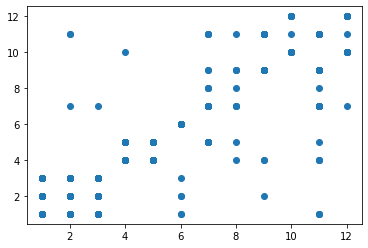

In [82]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred_dt_2)

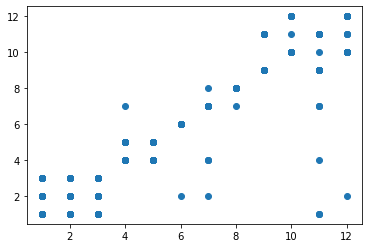

In [92]:
plt.scatter(y_test,y_pred_rf_2)

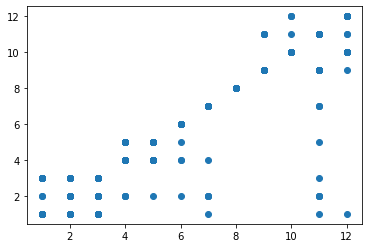

In [98]:
plt.scatter(y_test,y_pred_knn_2)

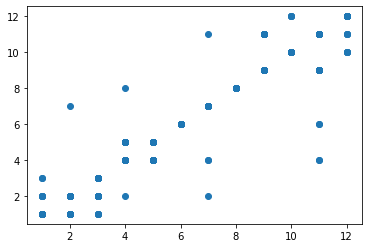

In [94]:
plt.scatter(y_test,y_pred_2)

### Wnioski
Nieniejsze laboratorium jest bardzo ważne, ponieważ ma zastosowanie w wielu dziedzinach ogólnie pojętej sztucznej inteligencji, a przede wszystkim przy ocenie naszych modeli. Miary, które wykorzystaliśmy w tych ćwiczeniach bardzo dobrze oddają to jak nasz model działa i na ile jest efektywny. Klasyfikatory na których operowaliśmy są nam już trochę znane przez materiał poznany na poprzednim semestrze, jednak dopiero teraz mieliśmy okazję zobaczyć jak działają na rzeczywistym (dość obszernym) zbiorze danych pochodzącym z archiwum "ics". Co do miar oceny jakości modelu wartości procentowe są bardzo zbliżone pomiędzy sobą w kwestii tego samego klasyfikatora, jednak w porównaniu z innymi widać już zauważalne róznice. Jeśli chodzi o najważniejszą ocenę - accuracy, najlepszym klasyfikatorem okazał się SVM, zaś znacznie słabszy w tym wypadku, bo ponad o 12 procent to "random forest". Dzięki temu laboratorium poznaliśmy też pomocną rzecz jaką jest funckja classification report, która daje nam podsumowanie najważneijszych miar na jednej macierzy wraz z ich wagami. Po raz kolejny, przy takiej charakterystyce zadań skorzystaliśmy z GridSearch, który pomaga przy wyszukiwaniu najlepszych parametrów dla modelu, aczkolwiek jego zastosowanie jest dość kosztowne ze względu na czas ich wyszukiwania. Podsumowując: Laboratorium było dobrym przełożeniem samej teorii na praktykę w danych i pozwoliło nauczyć się zastosowania go. Należy również wspomnieć, że sam zbiór danych był dość obszerny i nie wszsytkie środowiska i serwery jupytera dawały sobie z nim radę.